<a href="https://colab.research.google.com/github/Liang130520/tibaml1017/blob/main/class1017_machine_learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 統計需要的資料量
# Machine learning: 1K 以上, Deep learning: 1W以上
# 資料量多寡 -> 問題難度(大概跟欄位數目掛勾)

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
# iris # 鳶尾花的所有資料
df = pd.DataFrame(iris["data"], columns = iris["feature_names"]) # pandas的表個型態
df["ans"] = iris["target"]
df

load_iris 詳細資料-> feature_names': ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)'], 'filename': 'iris.csv', 'data_module': 'sklearn.datasets.data'}
'target_names': array(['setosa', 'versicolor', 'virginica'] 分別對應 target 0, 1, 2

In [ ]:
# 處理資料: pandas -> DataFrame
# 進到sklearn: numpy -> array
import numpy as np
from sklearn.model_selection import train_test_split

x = df.drop("ans", axis = 1) # 去除直欄 "ans", 產生一個新表格 x, 原 df 仍有 ans 直欄
x = np.array(x)
y = np.array(df["ans"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1) # 90% x, 10% x, 90% y, 10% y
show = x_test
print(show)
print("-----------------------")
x_train
# train_test_split([1, 2, 3, 4],
#                   [5, 6, 7, 8],
#                   [9, 10, 11, 12],
#                   test_size = 0.25)  
# # test_size 進行 ?:? 內容隨機切等分, ex:0.25 = 3:1, 0.1 = 9:1, 且若有多選項, 將會有同相對應位置

In [ ]:
d = pd.DataFrame([
        [1, 2],
        [3, 4]
    ], columns = ["a", "b"], index = ["a", "b"])

d.drop("a", axis = 0) # b(3, 4) 列 a 被去除, 形成新表格
d.drop("a", axis = 1) # b(2, 4) 欄 a 被去除, 形成新表格

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train) # 模型訓練

[Text(0.5, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass =

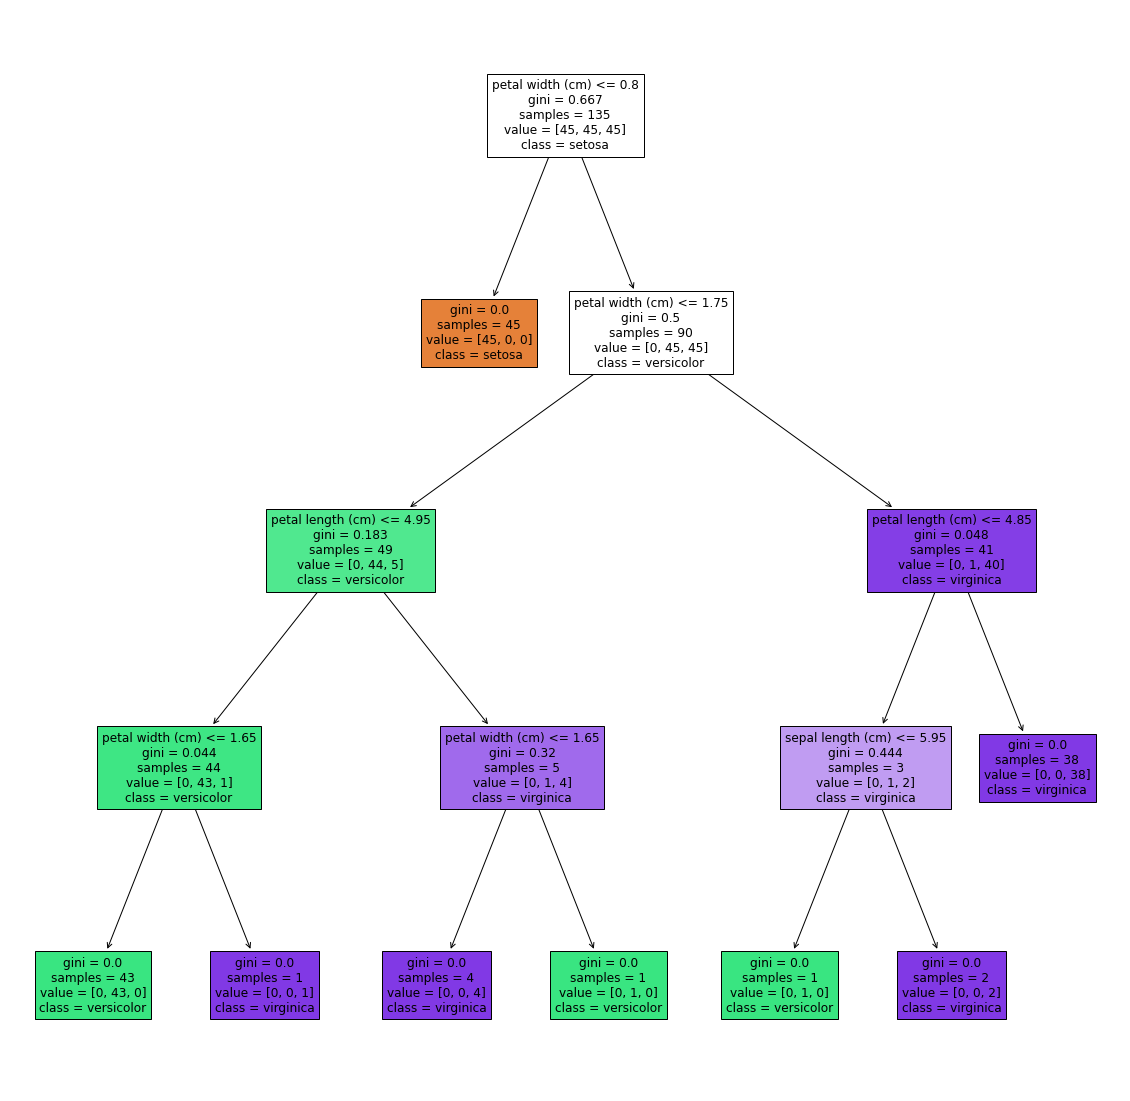

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20)) # 圖片放大, 數值越大, 呈現越大
plot_tree(clf, 
          feature_names = iris["feature_names"], 
          filled = True, 
          class_names = iris["target_names"]) 
# 模型樹 
# 左邊是 T, 右邊是 F
# feature_names 最上層判斷用資料名稱
# filled 將圖片上色, 以利辨識
# class_names 寫出當下判斷結果
# 模型會持續進行到所有可能的 gini係數(判斷錯誤可能性) 皆成為 0, 才會停下
# gini係數計算方式, (p1 * (1-p1) + p2 * (1-p2)+.........) 
# [猜:60%對,40%錯, 猜的每次正確機率:60%對, 40%錯] -> if 要取得猜錯機率 -> [猜對:60%*40% + 猜錯:40%*60%] = 48%